In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

tf.__version__

'2.5.0'

6


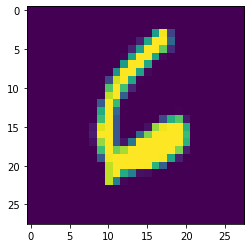

In [2]:
#Load Dataset
fashionMnist = keras.datasets.mnist
(xTrainFull, yTrainFull), (xTest, ytest) = fashionMnist.load_data()

#Scale input features
xValid, xTrain = xTrainFull[:5000] / 255.0, xTrainFull[5000:] / 255.0
yValid, yTrain = yTrainFull[:5000], yTrainFull[5000:]

classNames = [0,1,2,3,4,5,6,7,8,9]
print(classNames[yTrain[3]])
imgplot = plt.imshow((xTrain[3]))

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation =  "relu"))
model.add(keras.layers.Dense(100, activation =  "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))
#model.summary()
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [4]:
history = model.fit(xTrain, yTrain, epochs = 5, validation_data = (xValid, yValid))

Epoch 1/5
1719/1719 [==============================] - 24s 10ms/step - loss: 0.6107 - accuracy: 0.8426 - val_loss: 0.3068 - val_accuracy: 0.9154
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2889 - accuracy: 0.9183 - val_loss: 0.2393 - val_accuracy: 0.9344
Epoch 3/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2361 - accuracy: 0.9332 - val_loss: 0.2048 - val_accuracy: 0.9438
Epoch 4/5
1719/1719 [==============================] - 15s 9ms/step - loss: 0.2008 - accuracy: 0.9425 - val_loss: 0.1786 - val_accuracy: 0.9502
Epoch 5/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1746 - accuracy: 0.9504 - val_loss: 0.1593 - val_accuracy: 0.9540


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

ModuleNotFoundError: No module named 'pandas'

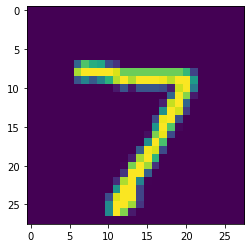

El número en la imágen es  7


In [7]:
import numpy as np
import matplotlib.image as mpimg

xNew = xTest[0:1]
yProba = model.predict(xNew)
yProba.round(2)

imgplot = plt.imshow((xNew[0] / 255))
plt.show()
yPred = model.predict(xNew)
#print(yPred[0])
print("El número en la imágen es ", np.array(classNames[np.argmax(yPred)]))
model.save("mnist.h5")